# Cardekho
www.cardekho.com 

### Get the Data

This dataset contains information about used cars listed on www.cardekho.com 
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression
in Machine Learning.
The columns in the given dataset are as follows:

* Vehicle_name - Name of the cars and the two wheelers.
* Present_Price - Market Value of the vehicle.
* year - Manufactured year
* Selling_price - Sale price in Rs.
* km_driven - Kilometers driven from the time of purchase
* fuel - Fuel type (Petrol,Desiel and CNG)
* seller_type - Whether its a Dealer or Private
* transmission - Manual or Auto
* Owner

## **Objective**
To Predict the selling price of the vehicles with respect to there year(manufactured year),present year,kilometer driven, fuel type, seller type, transmission and the owners.

**Importing the required libraries**

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

%matplotlib inline
## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0


In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
#Renaming the column from Car_Name to  Vehicle_Name

In [6]:
df.columns = ['Vehicle_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Vehicle_Name   301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [9]:
df.shape

(301, 9)

In [10]:
#Categorical features
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
df.Vehicle_Name.value_counts().sort_values(ascending=False).head(50)

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
sx4                           6
eon                           6
ertiga                        6
i10                           5
swift                         5
alto k10                      5
Bajaj Pulsar 150              4
ritz                          4
Royal Enfield Thunder 350     4
dzire                         4
etios liva                    4
wagon r                       4
Yamaha FZ S V 2.0             3
Honda CB Hornet 160R          3
creta                         3
etios cross                   3
Royal Enfield Thunder 500     3
Bajaj Pulsar NS 200           3
Bajaj Avenger 220             3
xcent   

In [12]:
## Checking missing values
df.isnull().sum()

Vehicle_Name     0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.columns


Index(['Vehicle_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df['Current_Year']=2020

In [15]:
df['Vehicle_Age']=df['Current_Year']-df['Year']

In [16]:
df.head()

,Vehicle_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [17]:
# Now the current year and Year is not required because we have the vehicles age

In [18]:
df.drop(['Current_Year'],axis=1,inplace=True)
df.drop(['Year'],axis=1,inplace=True)

In [19]:
df.head()

,Vehicle_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### Converting the catagorical feature(Fuel_Type	Seller_Type	Transmission) into onehot encoding 

In [20]:
df.columns

Index(['Vehicle_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Vehicle_Age'],
      dtype='object')

In [21]:
df_onehot_columns = df[['Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Vehicle_Age']]

In [22]:
onehotencode_df = pd.get_dummies(df_onehot_columns)

In [23]:

onehotencode_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1


## Exploratory Data Analysis

**Let's explore the data!**

In [24]:
df.columns

Index(['Vehicle_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Vehicle_Age'],
      dtype='object')

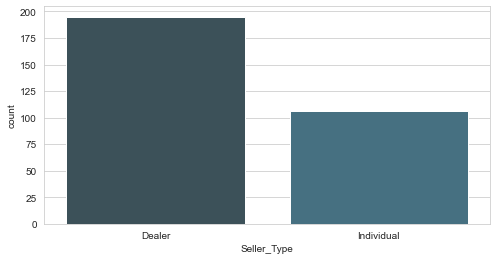

In [25]:
plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(df['Seller_Type'])


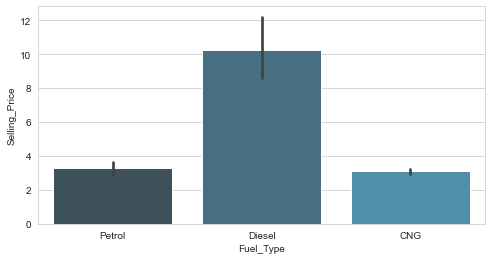

In [26]:
# Diesel cars are most expensive
sns.barplot(x="Fuel_Type", y="Selling_Price", data=df)


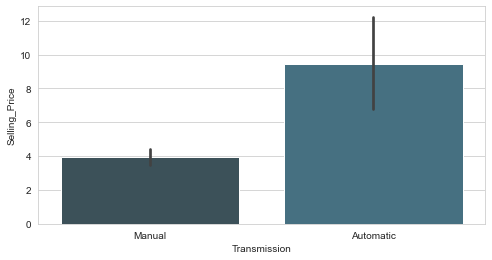

In [27]:
# Automatic cars have higher selling price
sns.barplot(x="Transmission", y="Selling_Price", data=df)

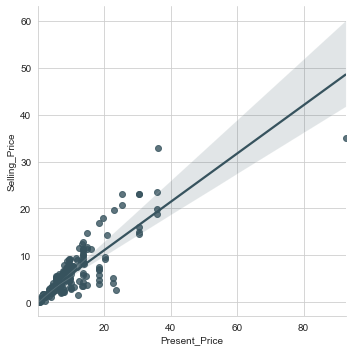

In [28]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=df)

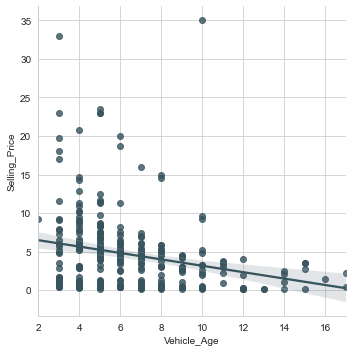

In [29]:
sns.lmplot(x='Vehicle_Age',y='Selling_Price',data=df)

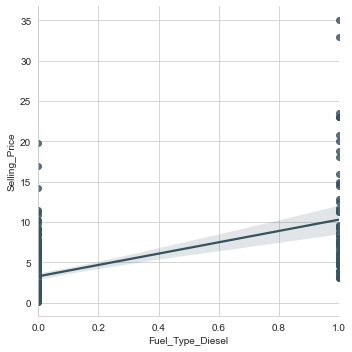

In [30]:
sns.lmplot(x='Fuel_Type_Diesel',y='Selling_Price',data=onehotencode_df)

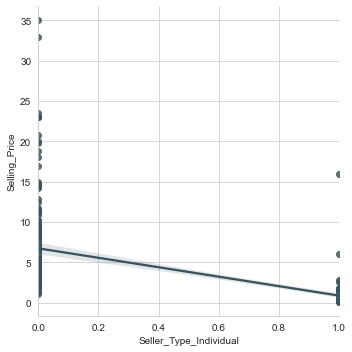

In [31]:
sns.lmplot(x='Seller_Type_Individual',y='Selling_Price',data=onehotencode_df)

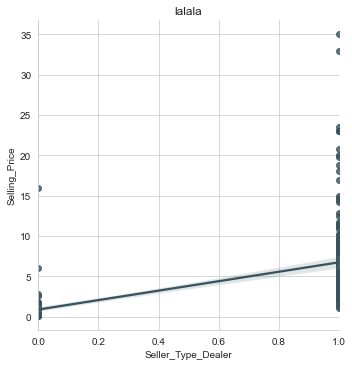

In [32]:
sns.lmplot(x='Seller_Type_Dealer',y='Selling_Price',data=onehotencode_df).set(title='lalala')


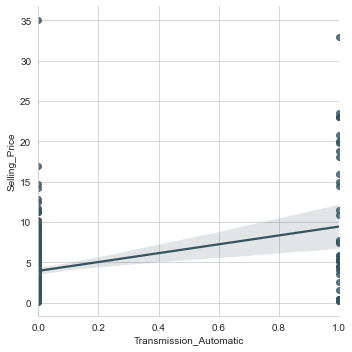

In [33]:
sns.lmplot(x='Transmission_Automatic',y='Selling_Price',data=onehotencode_df)

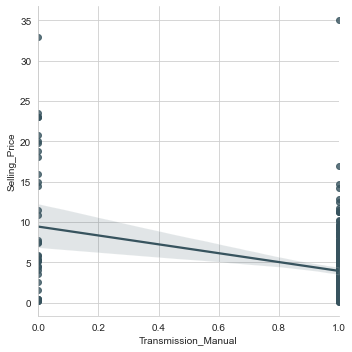

In [34]:
sns.lmplot(x='Transmission_Manual',y='Selling_Price',data=onehotencode_df)

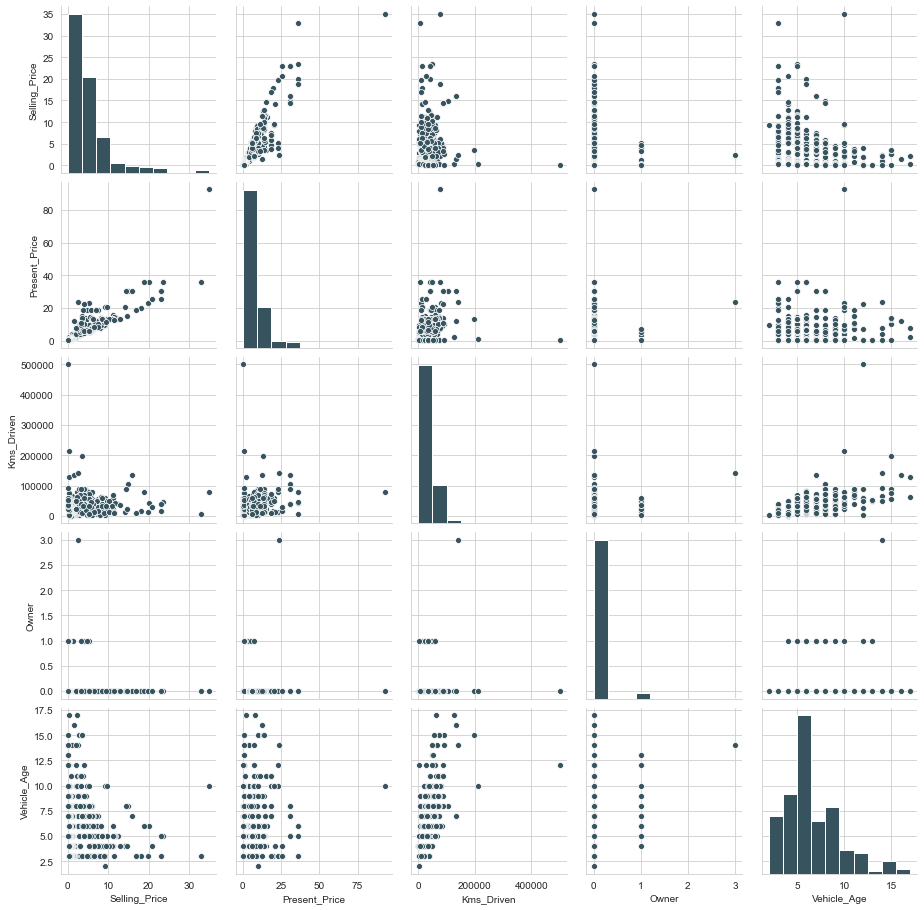

In [35]:
sns.pairplot(df)

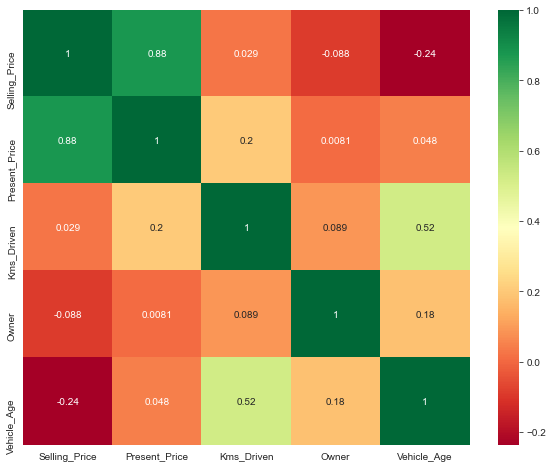

In [36]:
corrmat=df.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(10,8))
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Its observed that there is correlation between the present price and the selling price.And aslo with the Vehicle age and the Km driven.

In [37]:
df.sample()

,Vehicle_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
82,innova,23.0,25.39,15000,Diesel,Dealer,Automatic,0,3


### Converting the catagorical feature into Label encoding 

**Label Encoding for the Vehicle Name column**

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Vehicle_Name'])
df['Vehicle_Name'] = le.fit_transform(df['Vehicle_Name'])
LabelEncoder_df = df['Vehicle_Name']


**Concatenating the LabelEncodered Dataframe, onehotencoded Dataframe**

In [39]:
Final_Dataset = pd.concat([LabelEncoder_df, onehotencode_df], axis=1, sort=False)
Final_Dataset.head()

,Vehicle_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,90,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,93,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,68,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,96,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,92,4.60,6.87,42450,0,6,0,1,0,1,0,0,1


## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** We are setting a variable X equal to the numerical features of the cars(final_dataset) and a variable y equal to the "Selling_Price" column. **

In [40]:
Final_Dataset.columns

Index(['Vehicle_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Vehicle_Age', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [41]:
X = Final_Dataset[['Vehicle_Name','Present_Price', 'Kms_Driven', 'Owner',
       'Vehicle_Age', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual']]
y = Final_Dataset['Selling_Price']

In [42]:
X.columns

Index(['Vehicle_Name', 'Present_Price', 'Kms_Driven', 'Owner', 'Vehicle_Age',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [43]:
y.head

<bound method NDFrame.head of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64>

# Linear Regression

### Train Test Split

**Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Setting test_size=0.3 and random_state=42**

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [46]:
X_train.shape

(210, 12)

### Training the Model



In [47]:
from sklearn.linear_model import LinearRegression

Create an instance of a LinearRegression() model named lm.

In [48]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [49]:
model = lm.fit(X_train,y_train)

Checking whether the model is perfect / overfitted / underfitted. 

In [50]:
#  Training Score Linear Model
print("model score of trained set :",model.score(X_train,y_train))

model score of trained set : 0.8828046417340847


In [51]:
# Test Score Linear Model
print("model score of test set :", model.score(X_test,y_test))

model score of test set : 0.8755720672630244


#### Accuracy check
The **trainning  score > than the test score** it means that our model is overfitted.
We are going to solve this by using Regularization techniques namely  
**Ridge Regression and Lasso Regression**.

# Ridge Regression

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
ridge_alphas = np.logspace(-6, 6, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10,normalize = True)
optimal_ridge.fit(X, y)



RidgeCV(alphas=array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05,
       1.60705282e-05, 1.84642494e-0...
       4.10265811e+04, 4.71375313e+04, 5.41587138e+04, 6.22257084e+04,
       7.14942899e+04, 8.21434358e+04, 9.43787828e+04, 1.08436597e+05,
       1.24588336e+05, 1.43145894e+05, 1.64467618e+05, 1.88965234e+05,
       2.17111795e+05, 2.49450814e+05, 2.86606762e+05, 3.29297126e+05,
       3.78346262e+05, 4.34701316e+05, 4.99450512e+05, 5.73844165e+05,
       6.59318827e+05, 7.57525026e+05, 8.70359136e+05, 1.00000000e+06]),
        cv=10, normalize=True)

In [54]:
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 1e-06
Score: 0.8825833415877314


In [55]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    plt.figure(figsize=(15,5))
    sns.barplot(x="variable", y="coef", data=model_coefs)
    


   

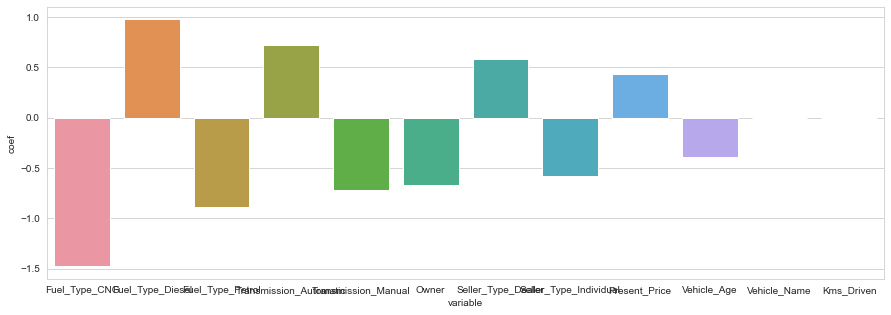

In [56]:
view_coeff(X, optimal_ridge)

In [57]:
coeff_df = pd.DataFrame(optimal_ridge.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Vehicle_Name,-0.001101
Present_Price,0.437344
Kms_Driven,-0.000007
Owner,-0.672094
Vehicle_Age,-0.392645
Fuel_Type_CNG,-1.479404
Fuel_Type_Diesel,0.975282
Fuel_Type_Petrol,-0.892016
Seller_Type_Dealer,0.583769
Seller_Type_Individual,-0.583769


# Lasso Reggression

In [58]:
# Find Optimal Lasso Using LassoCV
lasso_alphas = np.logspace(-6, 6, 200)
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10,normalize = True)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.01448118227674533
Score: 0.8718460477090441


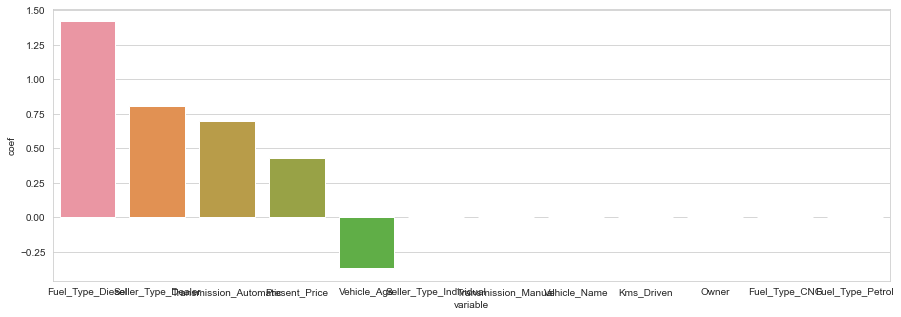

In [59]:
# Plot Coefficient
view_coeff(X, optimal_lasso)

In [60]:
coeff_df = pd.DataFrame(optimal_lasso.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Vehicle_Name,0.000000e+00
Present_Price,4.299720e-01
Kms_Driven,-0.000000e+00
Owner,-0.000000e+00
Vehicle_Age,-3.712688e-01
Fuel_Type_CNG,-0.000000e+00
Fuel_Type_Diesel,1.420255e+00
Fuel_Type_Petrol,-0.000000e+00
Seller_Type_Dealer,8.097528e-01
Seller_Type_Individual,-8.574390e-16


## Predicting Test Data with linear Regression, Ridge Regression and Lasso Regression

In [61]:
predictions_lm = lm.predict(X_test)
prediction_ridge=optimal_ridge.predict(X_test)
prediction_lasso=optimal_lasso.predict(X_test)

Scatterplot of the real test values versus the predicted values of **linear Regression, Ridge Regression and Lasso Regression.** 

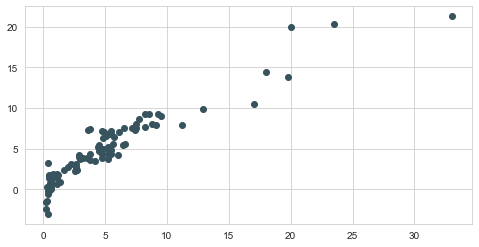

In [62]:
plt.scatter(y_test,predictions_lm)

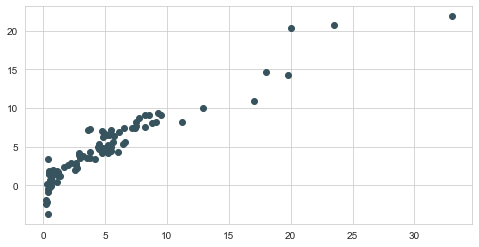

In [63]:
plt.scatter(y_test,prediction_ridge)

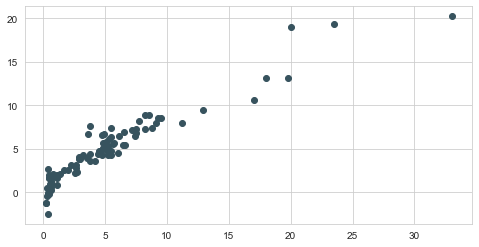

In [64]:
plt.scatter(y_test,prediction_lasso)

## Evaluating the Models

 1. Regression Evaluation Metrics - **Linear Regression**



In [65]:
from sklearn import metrics
r2 = metrics.r2_score(y_test, predictions_lm)
print("R2 :", metrics.r2_score(y_test, predictions_lm))    
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted r2 : " ,adj_r2 )

print('MAE  (Mean Absolute Error) :', metrics.mean_absolute_error(y_test, predictions_lm))
print('MSE  (MeanSquared Error) :', metrics.mean_squared_error(y_test, predictions_lm))
print('RMSE (Root Mean Squared Error) :', np.sqrt(metrics.mean_squared_error(y_test, predictions_lm)))

R2 : 0.8616840525933601
Adjusted r2 :  0.8532587156954937
MAE  (Mean Absolute Error) : 1.234339540806696
MSE  (MeanSquared Error) : 4.136484566781288
RMSE (Root Mean Squared Error) : 2.03383494088908


2.Evaluating the Model - Regression Evaluation Metrics - **Ridge Regression**

In [66]:
from sklearn import metrics
r2 = metrics.r2_score(y_test, prediction_ridge)
print("R2 :", metrics.r2_score(y_test, prediction_ridge))    
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted r2 : " ,adj_r2 )

print('MAE  (Mean Absolute Error) :', metrics.mean_absolute_error(y_test, prediction_ridge))
print('MSE  (MeanSquared Error) :', metrics.mean_squared_error(y_test, prediction_ridge))
print('RMSE (Root Mean Squared Error) :', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge)))

R2 : 0.871340377132113
Adjusted r2 :  0.8635032427442214
MAE  (Mean Absolute Error) : 1.203143085282369
MSE  (MeanSquared Error) : 3.847701977533268
RMSE (Root Mean Squared Error) : 1.961556009277652


3.Evaluating the Model - Regression Evaluation Metrics - **Lasso Regression**

In [67]:
from sklearn import metrics
r2 = metrics.r2_score(y_test, prediction_lasso)
print("R2 :", metrics.r2_score(y_test, prediction_lasso))    
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print("Adjusted r2 : " ,adj_r2 )

print('MAE  (Mean Absolute Error) :', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE  (MeanSquared Error) :', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE (Root Mean Squared Error) :', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

R2 : 0.8520822460394833
Adjusted r2 :  0.8430720275241219
MAE  (Mean Absolute Error) : 1.203415156540235
MSE  (MeanSquared Error) : 4.423636738081994
RMSE (Root Mean Squared Error) : 2.1032443362771702


## Residuals

Let's quickly explore the residuals of 3 models to make sure everything was okay with our data.

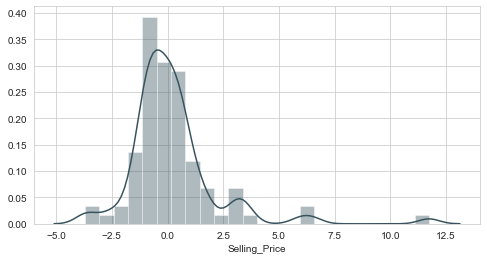

In [68]:
# Linear Regression
sns.distplot((y_test-predictions_lm));

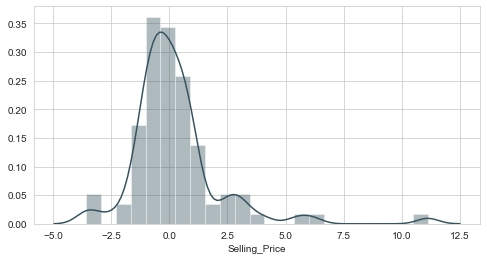

In [69]:
# Ridge Regression
sns.distplot(y_test-prediction_ridge)

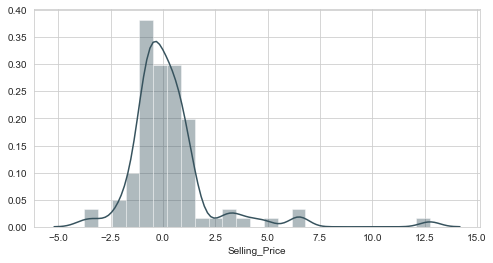

In [70]:
#Lasso Regression
sns.distplot(y_test-prediction_lasso)

## Conclusion

I would prefer to go with Ridge Regression technique because It gives the higher R^2  comparing to the other 2 models.

Let's see if we can interpret the coefficients at all to get an idea.

Here the coefficients are the Target variable (selling price) with respect to all the predictors.


In [71]:
coeff_df = pd.DataFrame(optimal_ridge.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Vehicle_Name,-0.001101
Present_Price,0.437344
Kms_Driven,-0.000007
Owner,-0.672094
Vehicle_Age,-0.392645
Fuel_Type_CNG,-1.479404
Fuel_Type_Diesel,0.975282
Fuel_Type_Petrol,-0.892016
Seller_Type_Dealer,0.583769
Seller_Type_Individual,-0.583769


**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in **Present_Price** is associated with an **increase of Rs.0.437173 in selling price**.
- Holding all other features fixed, a 1 unit increase in **Kms_Driven** is associated with an **decrease of Rs.0.000007 selling price**.
- Holding all other features fixed, a 1 unit increase in **Owner** is associated with an **decrease of Rs.0.674167 selling price**.
- Holding all other features fixed, a 1 unit increase in **Vehicle_Age** is associated with an **decrease of Rs.0.393084 selling price**.
- Holding all other features fixed, a 1 unit increase in **Fuel_Type_CNG** is associated with an **decrease of Rs.1.496840 in selling price**.
- Holding all other features fixed, a 1 unit increase in **Fuel_Type_Diesel** is associated with an **increase of Rs.0.973100 in selling price**.
- Holding all other features fixed, a 1 unit increase in **Fuel_Type_Petrol** is associated with an **decrease of Rs.0.889183 selling price**.
- Holding all other features fixed, a 1 unit increase in **Seller_Type_Dealer** is associated with an **increase of Rs.0.560660 selling price**.
- Holding all other features fixed, a 1 unit increase in **Seller_Type_Individual** is associated with an **decrease of Rs.0.583769 selling price**.
- Holding all other features fixed, a 1 unit increase in **Transmission_Automatic** is associated with an **increase of Rs.0.723929 selling price**.
- Holding all other features fixed, a 1 unit increase in **Transmission_Manual** is associated with an **decrease of Rs.0.0.723929 selling price**.